In [0]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using TensorFlow backend.


Using Keras version: 2.2.5 backend: tensorflow


In [0]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
nb_classes = 10
img_rows, img_cols = 28, 28

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)

11493376/11490434 [==============================] - 2s 0us/step

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
Y_train: (60000, 10)


In [0]:
nb_units = 50

model = Sequential()

# Recurrent layers supported: SimpleRNN, LSTM, GRU:
model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________
None


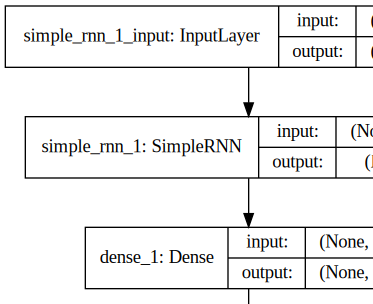

In [0]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:

epochs = 10

hist = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2)
model.evaluate(X_train, Y_train)[1]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 - 12s - loss: 0.8383 - acc: 0.7416
Epoch 2/10
 - 7s - loss: 0.3932 - acc: 0.8852
Epoch 3/10
 - 7s - loss: 0.3017 - acc: 0.9144
Epoch 4/10
 - 7s - loss: 0.2598 - acc: 0.9261
Epoch 5/10
 - 7s - loss: 0.2374 - acc: 0.9318
Epoch 6/10
 - 7s - loss: 0.2135 - acc: 0.9397
Epoch 7/10
 - 7s - loss: 0.2030 - acc: 0.9417
Epoch 8/10
 - 7s - loss: 0.1887 - acc: 0.9460
Epoch 9/10
 - 7s - loss: 0.1808 - acc: 0.9477
Epoch 10/10
 - 7s - loss: 0.1719 - acc: 0.9513


In [0]:
for i,layers in enumerate(model.layers):
  print(i,layers)

0 <keras.layers.recurrent.SimpleRNN object at 0x7f558bc7a630>
1 <keras.layers.core.Dense object at 0x7f558bc7a710>
2 <keras.layers.core.Activation object at 0x7f558ad74cf8>


NameError: ignored

In [0]:
len(model.layers[0].get_weights())

3